Pipeline
1. Cleaning awal ( permbersihan namun tidak melakukan imputasi atau endocing)
2. Split Data
3. EDA (data training)
4. Preprocessing
5. Modeling
6. Visualisai Final

In [ ]:
import pandas as pd
import os

### Load Data

In [ ]:
file_path = '/content/PhiUSIIL_Phishing_URL_Dataset.csv'

# Handle FileNotFoundError gracefully
if not os.path.exists(file_path):
    print(f"Error: The file '{file_path}' was not found in the current directory.")
    print("Please upload the dataset to your Colab environment or provide the correct path.")
    print("You can upload files using the following code in a new cell (or before this one):\n  from google.colab import files\n  uploaded = files.upload()")
    raise FileNotFoundError(f"'{file_path}' not found. Please upload the file and re-run this cell.")
else:
    df = pd.read_csv(file_path)
    print("Dataset loaded successfully.")

Dataset loaded successfully.


### Initial Inspection

In [ ]:
print("\n--- First 5 rows of the dataset ---")
display(df.head())

print("\n--- Data types and missing values ---")
df.info()

print("\n--- Sum of duplicate rows ---")
print(f"Number of duplicate rows: {df.duplicated().sum()}")


--- First 5 rows of the dataset ---


,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,521848.txt,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.0,1.000000,0.522907,...,0,0,1,34,20,28,119,0,124,1
1,31372.txt,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.0,0.666667,0.032650,...,0,0,1,50,9,8,39,0,217,1
2,597387.txt,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.0,0.866667,0.028555,...,0,0,1,10,2,7,42,2,5,1
3,554095.txt,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.0,1.000000,0.522907,...,1,1,1,3,27,15,22,1,31,1
4,151578.txt,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.0,1.000000,0.079963,...,1,0,1,244,15,34,72,1,85,1



--- Data types and missing values ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 56 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   FILENAME                    235795 non-null  object 
 1   URL                         235795 non-null  object 
 2   URLLength                   235795 non-null  int64  
 3   Domain                      235795 non-null  object 
 4   DomainLength                235795 non-null  int64  
 5   IsDomainIP                  235795 non-null  int64  
 6   TLD                         235795 non-null  object 
 7   URLSimilarityIndex          235795 non-null  float64
 8   CharContinuationRate        235795 non-null  float64
 9   TLDLegitimateProb           235795 non-null  float64
 10  URLCharProb                 235795 non-null  float64
 11  TLDLength                   235795 non-null  int64  
 12  NoOfSubDomain               23579

### Cleaning: Remove non-predictive identifier columns

Pada tahap ini, melakukan penghapusan kolom yang tidak akan berpengaruh ke hasil. penghapusan semua kolom katergorikal

In [ ]:
columns_to_drop = ['FILENAME', 'URL', 'Domain', 'Title', 'TLD']
df_clean = df.drop(columns=columns_to_drop, errors='ignore')
print(f"Columns dropped: {columns_to_drop}")

Columns dropped: ['FILENAME', 'URL', 'Domain', 'Title', 'TLD']


### Final Inspection of Cleaned DataFrame

In [ ]:
print("\n--- Data types and missing values of cleaned dataset ---")
df_clean.info()

print("\n--- Descriptive statistics of cleaned dataset ---")
display(df_clean.describe())


--- Data types and missing values of cleaned dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 51 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   URLLength                   235795 non-null  int64  
 1   DomainLength                235795 non-null  int64  
 2   IsDomainIP                  235795 non-null  int64  
 3   URLSimilarityIndex          235795 non-null  float64
 4   CharContinuationRate        235795 non-null  float64
 5   TLDLegitimateProb           235795 non-null  float64
 6   URLCharProb                 235795 non-null  float64
 7   TLDLength                   235795 non-null  int64  
 8   NoOfSubDomain               235795 non-null  int64  
 9   HasObfuscation              235795 non-null  int64  
 10  NoOfObfuscatedChar          235795 non-null  int64  
 11  ObfuscationRatio            235795 non-null  float64
 12  NoOfLettersInU

,URLLength,DomainLength,IsDomainIP,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
count,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,...,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000
mean,34.573095,21.470396,0.002706,78.430778,0.845508,0.260423,0.055747,2.764456,1.164758,0.002057,...,0.237007,0.023474,0.486775,26.075689,6.333111,10.522305,65.071113,2.377629,49.262516,0.571895
std,41.314153,9.150793,0.051946,28.976055,0.216632,0.251628,0.010587,0.599739,0.600969,0.045306,...,0.425247,0.151403,0.499826,79.411815,74.866296,22.312192,176.687539,17.641097,161.027430,0.494805
min,13.000000,4.000000,0.000000,0.155574,0.000000,0.000000,0.001083,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,16.000000,0.000000,57.024793,0.680000,0.005977,0.050747,2.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,27.000000,20.000000,0.000000,100.000000,1.000000,0.079963,0.057970,3.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,8.000000,2.000000,6.000000,12.000000,0.000000,10.000000,1.000000
75%,34.000000,24.000000,0.000000,100.000000,1.000000,0.522907,0.062875,3.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,29.000000,8.000000,15.000000,88.000000,1.000000,57.000000,1.000000
max,6097.000000,110.000000,1.000000,100.000000,1.000000,0.522907,0.090824,13.000000,10.000000,1.000000,...,1.000000,1.000000,1.000000,8956.000000,35820.000000,6957.000000,27397.000000,4887.000000,27516.000000,1.000000


Tahap selanjutnya, ya itu pemisahan untuk 2 fitur ya itu X dan Y. Dimana setelah pemisahan itu dilakukan 3 pemisahan data dari X nya

### 1. Pisahkan Fitur (X) dan Target (y)

In [ ]:
X = df_clean.drop('label', axis=1)
y = df_clean['label']

### 2. Split Data (Anti-Data Leakage)

Dari 100% data X di pisahkan menjadi 20% untuk test dan tersisa 80%. Dimana data 80% ini dibagi lagi menjadi 80:20 untuk Train dan Validasi. Dimana hasilnya menjadi Xtest 20%, Xtrain 64%, dan Xval 16%

#### Split 1: Pisahkan 20% untuk Test Set

In [ ]:
from sklearn.model_selection import train_test_split

X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

#### Split 2: Pisahkan sisa Train (80%) menjadi Train Final dan Validation (80/20 dari sisa)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.2, random_state=42, stratify=y_train_full
)

### Data Shapes

In [ ]:
print("--- Data Shapes ---")
print(f"X_train (Final Training Set) : {X_train.shape}")
print(f"X_val (Validation Set)       : {X_val.shape}")
print(f"X_test (Test Set)            : {X_test.shape}")

--- Data Shapes ---
X_train (Final Training Set) : (150908, 50)
X_val (Validation Set)       : (37728, 50)
X_test (Test Set)            : (47159, 50)


Tahap selanjutnya, ya itu EDA di mana EDA ini dilakukan pada data train saja fokus untuk data train.

### 3. EDA (Exploratory Data Analysis) - ON TRAIN SET ONLY

Pada visualisasi ini di bagi menjadi 2 kategori ya itu phishing dan legit (non phishing)

/tmp/ipython-input-486662371.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=feature, data=df_train, palette='viridis', ax=axes[i])
/tmp/ipython-input-486662371.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=feature, data=df_train, palette='viridis', ax=axes[i])
/tmp/ipython-input-486662371.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=feature, data=df_train, palette='viridis', ax=axes[i])


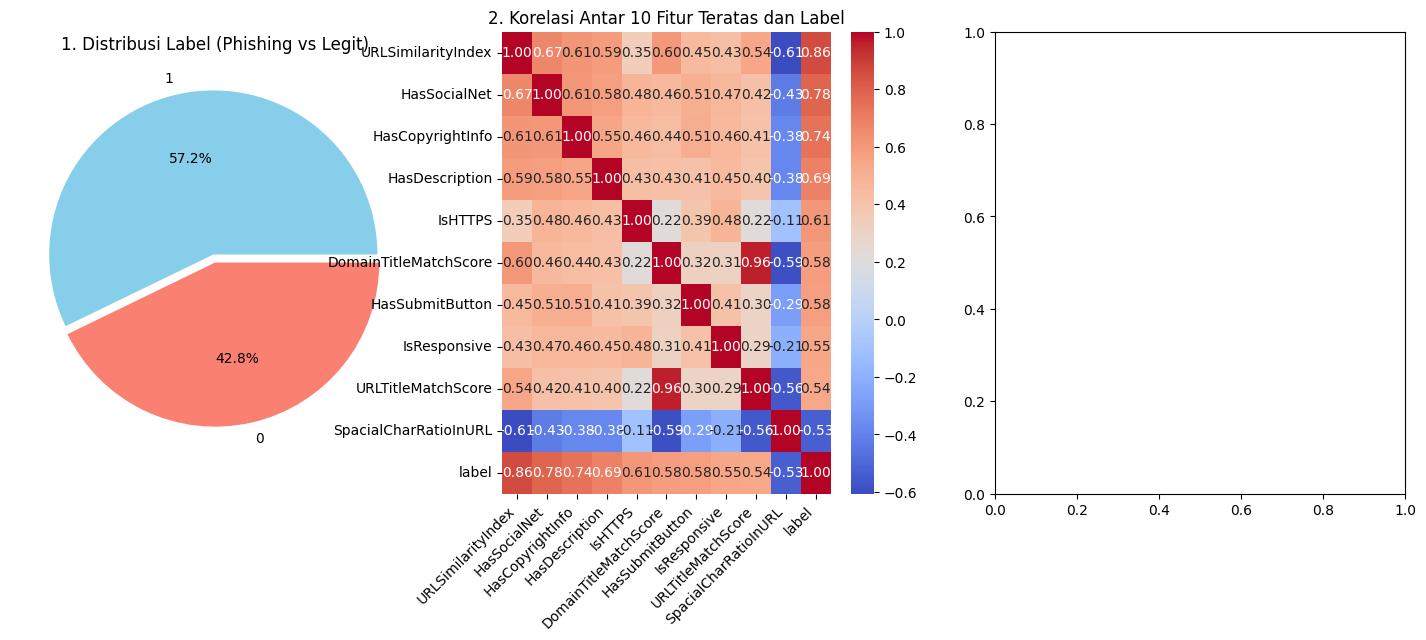

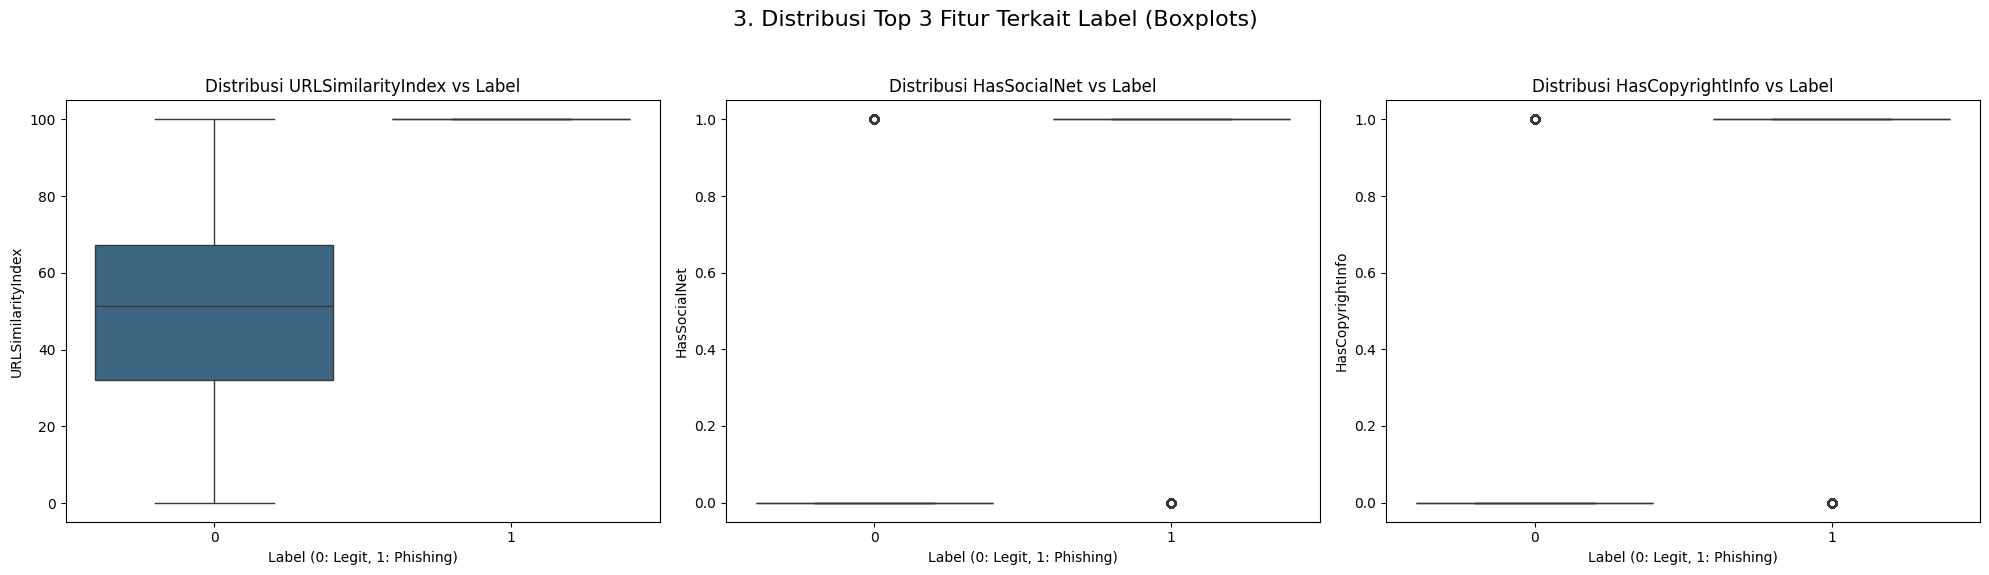

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gabungkan X_train dan y_train sementara untuk visualisasi
df_train = pd.concat([X_train, y_train], axis=1)

# --- Visualisasi 1: Target Distribution (Pie Chart) ---
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
y_train.value_counts().plot.pie(autopct='%1.1f%%', colors=['skyblue', 'salmon'], explode=[0.05, 0])
plt.title('1. Distribusi Label (Phishing vs Legit)')
plt.ylabel('')

# --- Visualisasi 2: Feature Correlation Heatmap (Top 10 Features) ---
plt.subplot(1, 3, 2)

# Hitung korelasi dengan label
corr_with_label = df_train.corr(numeric_only=True)['label'].abs().sort_values(ascending=False)

# Ambil top 10 fitur (excluding 'label' itself)
top_10_features = corr_with_label[1:11].index.tolist()

# Tambahkan 'label' kembali untuk heatmap korelasi antar top features dan label
df_top_10 = df_train[top_10_features + ['label']]

sns.heatmap(df_top_10.corr(numeric_only=True), annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('2. Korelasi Antar 10 Fitur Teratas dan Label')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)


# --- Visualisasi 3: Feature Distributions (Boxplots for Top 3 Correlated Features) ---
plt.subplot(1, 3, 3)

# Ambil top 3 fitur (excluding 'label' itself)
top_3_features = corr_with_label[1:4].index.tolist()

fig2, axes = plt.subplots(1, 3, figsize=(20, 6))
fig2.suptitle('3. Distribusi Top 3 Fitur Terkait Label (Boxplots)', fontsize=16)

for i, feature in enumerate(top_3_features):
    sns.boxplot(x='label', y=feature, data=df_train, palette='viridis', ax=axes[i])
    axes[i].set_title(f'Distribusi {feature} vs Label')
    axes[i].set_xlabel('Label (0: Legit, 1: Phishing)')
    axes[i].set_ylabel(feature)

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
plt.show()

plt.tight_layout()
plt.show()

Tahap selanjutnya, ya itu preprocessing di mana tahap ini kita melakukan imputasi, scale dan feature selection

### 4. Preprocessing Pipeline

1. pada tahap imputasi sebenarnya data sudah penuh namun kita melakukan imputasi untuk data yang akan datang jadi mempersiapkan jika data kedepannya terdapat data kosong
2. pada tahap scale jelas kita menyatukan semua rang menjadi 0-1 agar model tidak kebingungan dan tidak ada ketimpangan atau berat sebelah
3. pada feature selection kita melakukan top 20 feature dari 50 feature yang ada menggunakan f_classif (anova f-value)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif

# Define the numerical pipeline
# Step 1: Impute missing values with the median
# Step 2: Scale features using StandardScaler
# Step 3: Select the top 20 most predictive features using f_classif (ANOVA F-value)

numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('selector', SelectKBest(score_func=f_classif, k=20))
])

# Get all numerical column names from X_train
# Note: Since the instruction states the dataset now contains only numerical features, we apply to all.
all_numerical_features = X_train.columns.tolist()

# Create the ColumnTransformer to apply the numerical pipeline to all numerical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, all_numerical_features)
    ],
    remainder='passthrough' # Keep other columns (if any) as they are. In this case, there are none.
)

# Fit the preprocessor on X_train and y_train (y is needed for SelectKBest with f_classif)
preprocessor.fit(X_train, y_train)

# Transform X_train to verify it works and get the processed data
X_train_processed = preprocessor.transform(X_train)

print("Shape of processed X_train data:", X_train_processed.shape)

Shape of processed X_train data: (150908, 20)


Tahap selanjutnya, kita masuk ke modeling di mana modeling ini menggunakan 10 model yang digunakan

###5. Modeling

Pada tahap ini kita melakukan modeling pada data training yang sebelumnya sudah di pisahkan, setelah itu kita memunculkan hasil dari pengujiannya serta melihat learning curve untuk menentukan hasil nya bukan hanya dari angka namun dari hasil trainingnya

--- Initializing Models ---

--- Training and Evaluating Models ---
Training Logistic Regression...
Training SGD Classifier...
Training K-Nearest Neighbors...
Training Linear SVC...
Training Decision Tree...
Training Random Forest...
Training MLP Classifier...
Training Gaussian Naive Bayes...
Training XGBoost...
Training LightGBM...
[LightGBM] [Info] Number of positive: 86304, number of negative: 64604
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007805 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1744
[LightGBM] [Info] Number of data points in the train set: 150908, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.571898 -> initscore=0.289600
[LightGBM] [Info] Start training from score 0.289600

--- Model Performance Comparison ---


,Model,Accuracy,Precision,Recall,F1-Score
0,Linear SVC,0.999867,0.999768,1.000000,0.999884
1,MLP Classifier,0.999841,0.999722,1.000000,0.999861
2,XGBoost,0.999814,0.999676,1.000000,0.999838
3,Logistic Regression,0.999814,0.999676,1.000000,0.999838
4,Random Forest,0.999814,0.999676,1.000000,0.999838
5,LightGBM,0.999788,0.999722,0.999907,0.999815
6,SGD Classifier,0.999761,0.999583,1.000000,0.999791
7,Decision Tree,0.999761,0.999768,0.999815,0.999791
8,Gaussian Naive Bayes,0.998516,0.999814,0.997590,0.998701
9,K-Nearest Neighbors,0.998357,0.997687,0.999444,0.998564



--- Generating Learning Curves (This may take some time) ---
Generating learning curve for Logistic Regression...
Generating learning curve for SGD Classifier...
Generating learning curve for K-Nearest Neighbors...
Generating learning curve for Linear SVC...
Generating learning curve for Decision Tree...
Generating learning curve for Random Forest...
Generating learning curve for MLP Classifier...
Generating learning curve for Gaussian Naive Bayes...
Generating learning curve for XGBoost...
Generating learning curve for LightGBM...


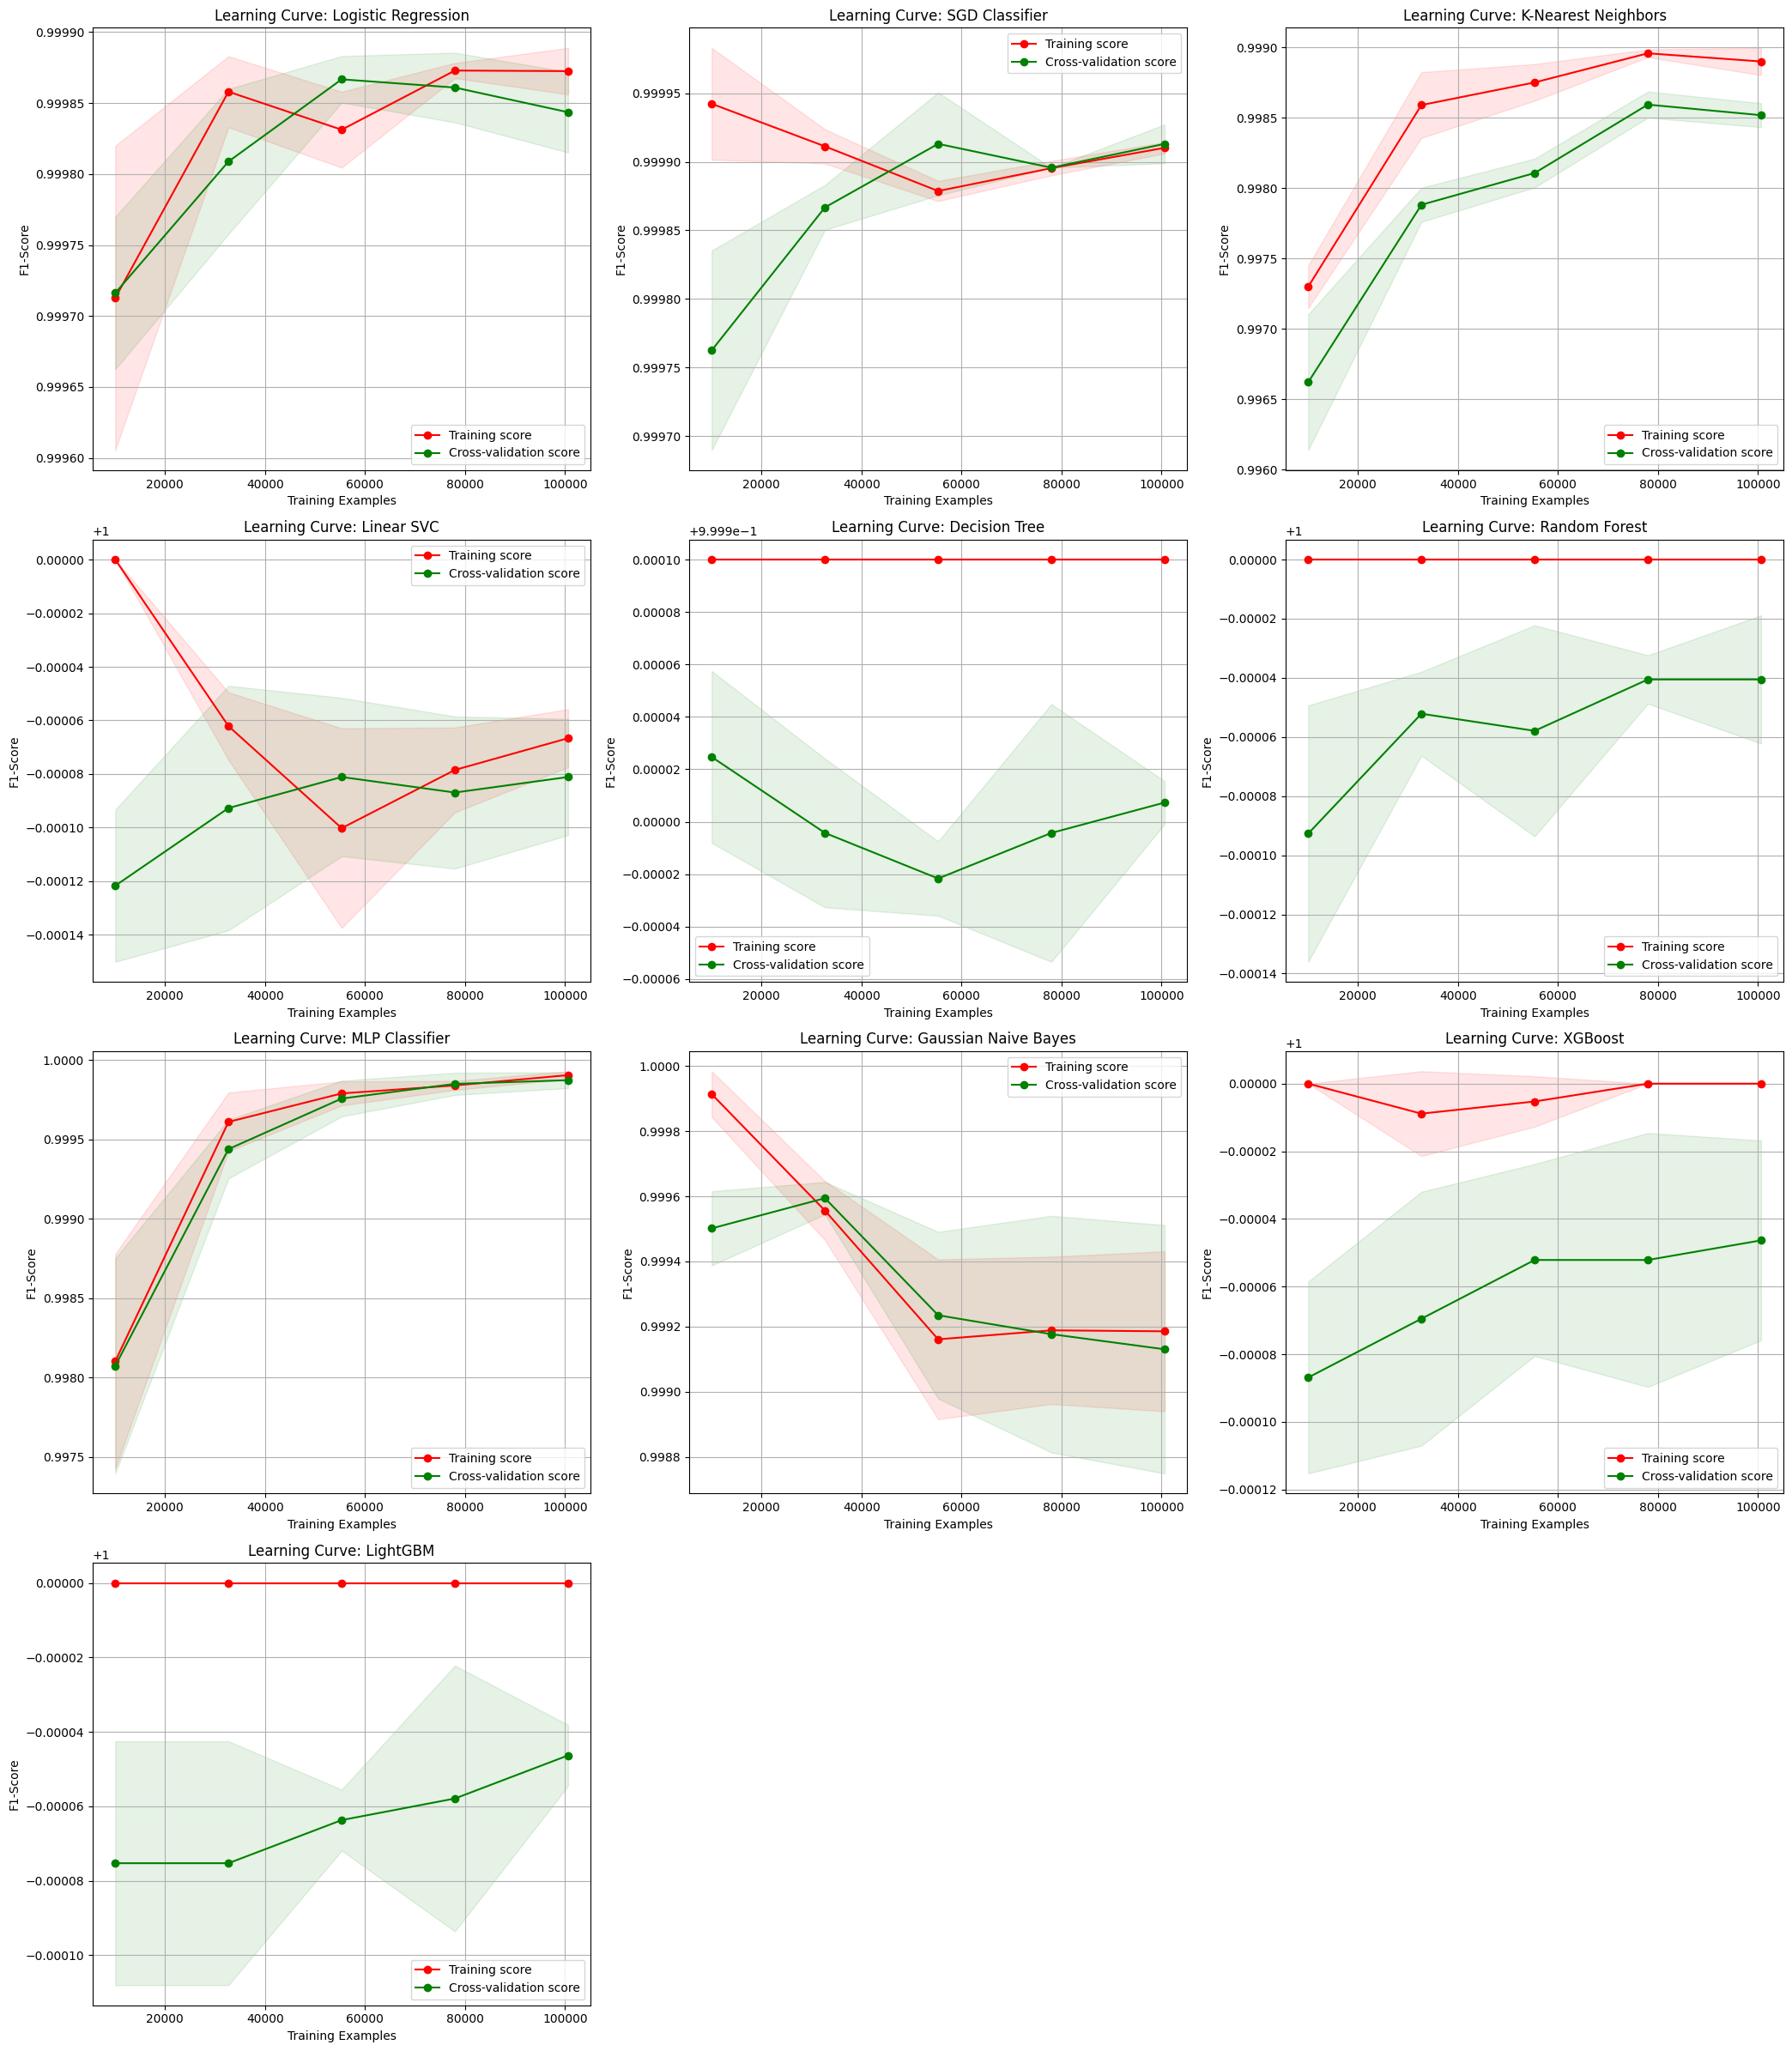


--- Summary and Insights ---
Based on the F1-Score, the best performing model on the validation set is Linear SVC with an F1-Score of 0.9999.

Insights from Learning Curves:
- Models showing a high training score and a significantly lower validation score (large gap) might be overfitting (e.g., Decision Tree without proper regularization).
- Models with both training and validation scores converging to a high value with increasing data suggest a good fit.
- Models where both scores are low or do not converge might be underfitting or require more data/feature engineering.
- If both scores converge but are still low, the model might have high bias, indicating it's too simple for the data.
Further analysis of individual learning curves would provide deeper insights into bias-variance trade-offs for each model.


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import learning_curve, StratifiedKFold

# Suppress all warnings for cleaner output
warnings.filterwarnings('ignore')

# 1. Define and Initialize Models
print("--- Initializing Models ---")

models = {
    "Logistic Regression": LogisticRegression(random_state=42, solver='liblinear', n_jobs=-1),
    "SGD Classifier": SGDClassifier(random_state=42, n_jobs=-1),
    "K-Nearest Neighbors": KNeighborsClassifier(n_jobs=-1),
    "Linear SVC": LinearSVC(random_state=42, dual=False, max_iter=2000), # dual=False for n_samples > n_features, increased max_iter
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42, n_jobs=-1),
    "MLP Classifier": MLPClassifier(random_state=42, max_iter=1000, early_stopping=True, n_iter_no_change=5, verbose=False), # Increased max_iter, added early stopping
    "Gaussian Naive Bayes": GaussianNB(),
    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss', n_jobs=-1),
    "LightGBM": LGBMClassifier(random_state=42, n_jobs=-1)
}

results = []

# 2. Train and Evaluate Models
print("\n--- Training and Evaluating Models ---")
for name, model in models.items():
    print(f"Training {name}...")
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_val)

    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)

    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1
    })

# 3. Display Model Performance Table
print("\n--- Model Performance Comparison ---")
results_df = pd.DataFrame(results)
results_df_sorted = results_df.sort_values(by="F1-Score", ascending=False).reset_index(drop=True)
display(results_df_sorted)

# 4. Generate Learning Curves
print("\n--- Generating Learning Curves (This may take some time) ---")
print("Warning: Learning curve generation can be computationally intensive, especially for complex models or large datasets.")

n_models = len(models)
n_cols = 3
n_rows = (n_models + n_cols - 1) // n_cols # Calculate number of rows needed

plt.figure(figsize=(n_cols * 7, n_rows * 6))

for i, (name, model) in enumerate(models.items()):
    ax = plt.subplot(n_rows, n_cols, i + 1)
    print(f"Generating learning curve for {name}...")

    # Create a pipeline for learning curve without fitting it beforehand
    # The learning_curve function will fit it multiple times
    lc_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

    train_sizes, train_scores, val_scores = learning_curve(
        lc_pipeline, X_train, y_train, cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=42),
        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5), scoring='f1', verbose=0
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    val_scores_mean = np.mean(val_scores, axis=1)
    val_scores_std = np.std(val_scores, axis=1)

    ax.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    ax.fill_between(train_sizes, val_scores_mean - val_scores_std,
                     val_scores_mean + val_scores_std, alpha=0.1, color="g")
    ax.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    ax.plot(train_sizes, val_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    ax.set_title(f'Learning Curve: {name}', fontsize=12)
    ax.set_xlabel("Training Examples")
    ax.set_ylabel("F1-Score")
    ax.legend(loc="best")
    ax.grid(True)

plt.tight_layout()
plt.show()

# 5. Final Task: Summarize results
print("\n--- Summary and Insights ---")
best_model_name = results_df_sorted.iloc[0]['Model']
best_f1_score = results_df_sorted.iloc[0]['F1-Score']

print(f"Based on the F1-Score, the best performing model on the validation set is {best_model_name} with an F1-Score of {best_f1_score:.4f}.")
print("\nInsights from Learning Curves:")
print("- Models showing a high training score and a significantly lower validation score (large gap) might be overfitting (e.g., Decision Tree without proper regularization).")
print("- Models with both training and validation scores converging to a high value with increasing data suggest a good fit.")
print("- Models where both scores are low or do not converge might be underfitting or require more data/feature engineering.")
print("- If both scores converge but are still low, the model might have high bias, indicating it's too simple for the data.")
print("Further analysis of individual learning curves would provide deeper insights into bias-variance trade-offs for each model.")

warnings.resetwarnings() # Reset warnings to default behavior


Tahap terakhir adalah final evaluasi, bisa kita lihat dari learning curve nya bahwa 3 model yang bagus digunakan dalam kasus ini adalah Logistic Regression, K-Nearest Neighbors, dan MLP Classifier

# 6. final evaluasi


In [ ]:
print("Initializing selected models...")

selected_models = {
    "Logistic Regression": LogisticRegression(random_state=42, solver='liblinear', n_jobs=-1),
    "K-Nearest Neighbors": KNeighborsClassifier(n_jobs=-1),
    "MLP Classifier": MLPClassifier(random_state=42, max_iter=1000, early_stopping=True, n_iter_no_change=5, verbose=False)
}

print("Selected models initialized successfully.")

Initializing selected models...
Selected models initialized successfully.


Setelah kita meng inisialisasikan 3 model yang bagus, selanjutnya kita akan menguji kembali 3 model tersebut menggunakan x_test yang sebelumnya sudah dibuat, serta akhirnya kita akan mengvisualisasikan confusion matrix agar melihat hasil sebenernya

--- Evaluating Selected Models on Test Set ---
Evaluating Logistic Regression...


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)



Classification Report for Logistic Regression:

              precision    recall  f1-score   support

       Legit       1.00      1.00      1.00     20189
    Phishing       1.00      1.00      1.00     26970

    accuracy                           1.00     47159
   macro avg       1.00      1.00      1.00     47159
weighted avg       1.00      1.00      1.00     47159

Evaluating K-Nearest Neighbors...


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)



Classification Report for K-Nearest Neighbors:

              precision    recall  f1-score   support

       Legit       1.00      1.00      1.00     20189
    Phishing       1.00      1.00      1.00     26970

    accuracy                           1.00     47159
   macro avg       1.00      1.00      1.00     47159
weighted avg       1.00      1.00      1.00     47159

Evaluating MLP Classifier...


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)



Classification Report for MLP Classifier:

              precision    recall  f1-score   support

       Legit       1.00      1.00      1.00     20189
    Phishing       1.00      1.00      1.00     26970

    accuracy                           1.00     47159
   macro avg       1.00      1.00      1.00     47159
weighted avg       1.00      1.00      1.00     47159



/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


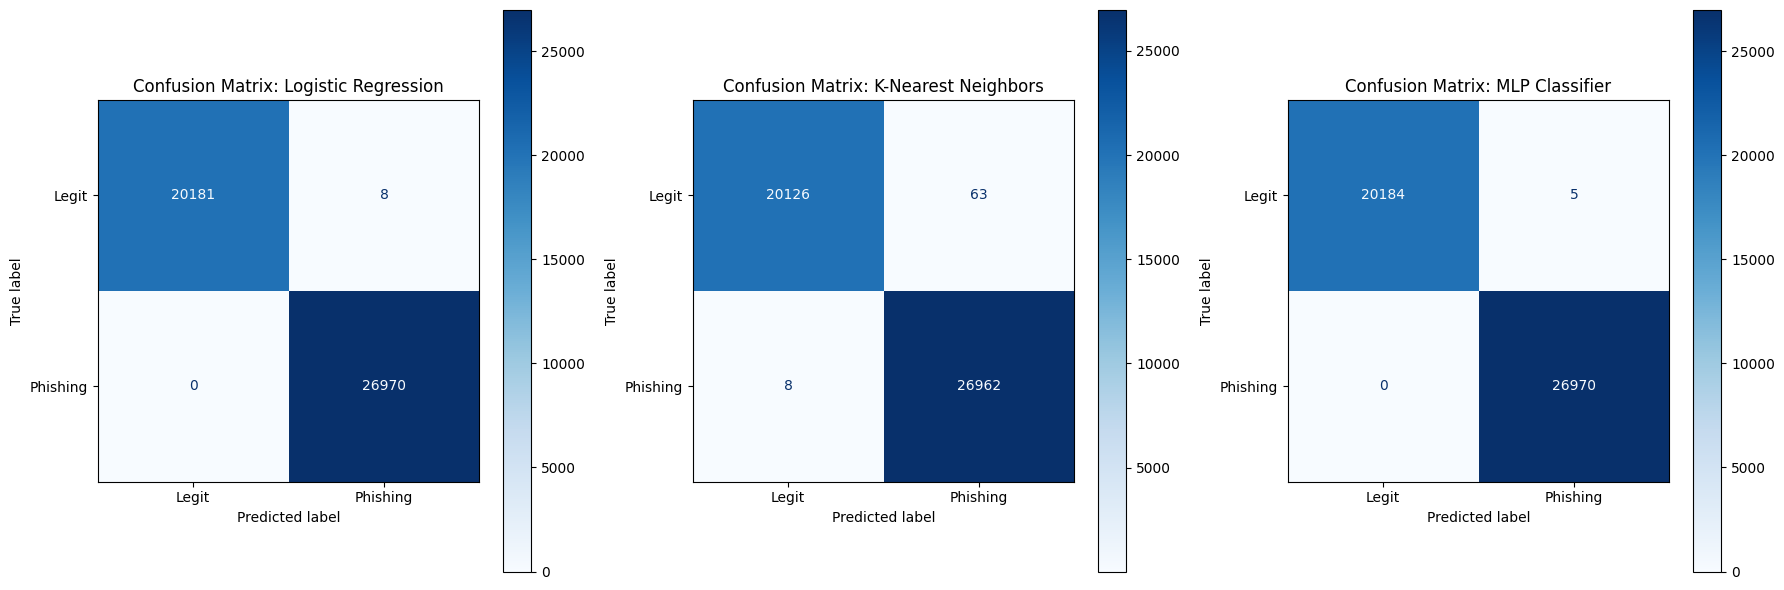

Evaluation complete for selected models.


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

print("--- Evaluating Selected Models on Test Set ---")

# Prepare target names for classification report and confusion matrix
target_names = ['Legit', 'Phishing']

plt.figure(figsize=(18, 6))

for i, (name, model) in enumerate(selected_models.items()):
    print(f"Evaluating {name}...")

    # Create a pipeline with the preprocessor and the current classifier
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

    # Fit the pipeline on the full training data (X_train, y_train)
    pipeline.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = pipeline.predict(X_test)

    # Print classification report
    print(f"\nClassification Report for {name}:\n")
    print(classification_report(y_test, y_pred, target_names=target_names))

    # Plot Confusion Matrix
    ax = plt.subplot(1, len(selected_models), i + 1)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
    disp.plot(cmap='Blues', ax=ax, values_format='d') # values_format='d' for integer numbers
    ax.set_title(f'Confusion Matrix: {name}')
    plt.grid(False)# Remove grid lines if any

plt.tight_layout()
plt.show()

print("Evaluation complete for selected models.")